### import libraries

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessing

/home/azad/anaconda3/envs/bnn/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### visualize data balance

In [4]:
train_path = r'data/sign_mnist_train.csv'
data = pd.read_csv(train_path)

<AxesSubplot:xlabel='label', ylabel='count'>

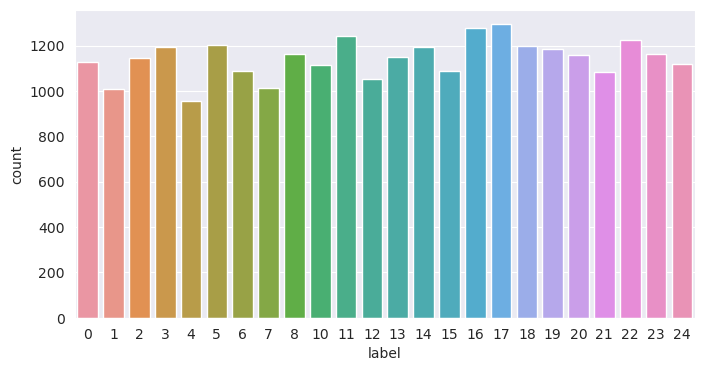

In [5]:
plt.figure(figsize = (8,4)) # Label Count
sns.set_style("darkgrid")
sns.countplot(x='label', data=data)

### pre-preprocessing and splitting Dataset (training, validation)

In [13]:
train = r'data/sign_mnist_train.csv'
test = r'data/sign_mnist_test.csv'
train_data, val_data, test_data = preprocessing.make_dataset(train_path=train, test_path=test)

### vislualizing the Dataset

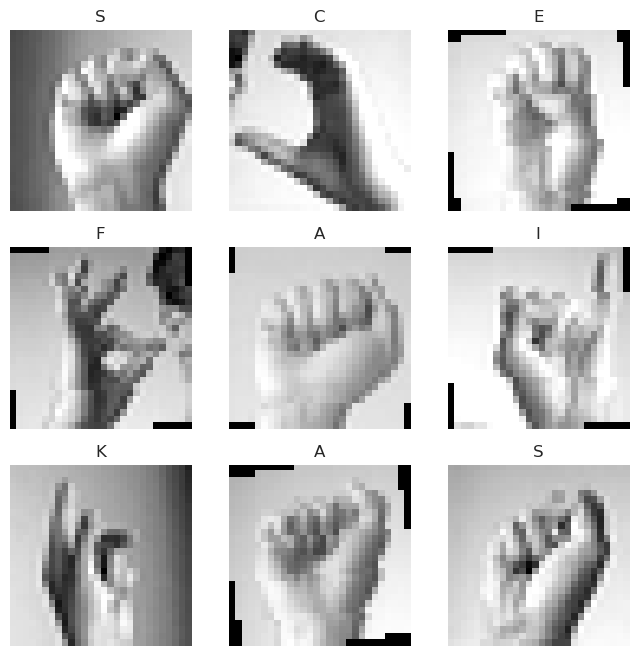

In [14]:
labels_map = {
    0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 
    6: "G", 7: "H", 8: "I", 9: "K", 10: "L", 11: "M",
    12: "N", 13: "O", 14: "P", 15: "Q", 16: "R", 17: "S",
    18: "T", 19: "U", 20: "V", 21: "W", 22: "X", 23: "Y",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label.item()])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### DataLoader

In [15]:
batch_size=64

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=val_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

### iterate through the DataLoader

images batch shape  : torch.Size([64, 1, 28, 28])
Labels batch shape  : torch.Size([64])


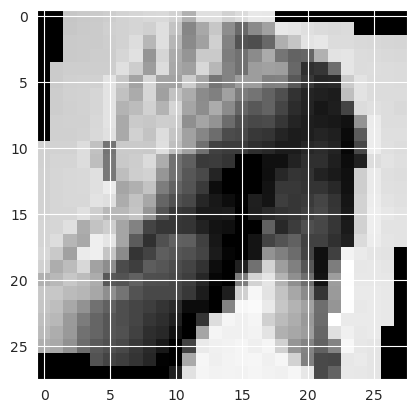

Label: Q


In [16]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))
print(f"images batch shape  : {train_features.size()}")
print(f"Labels batch shape  : {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}")

### data summary

In [17]:
print('type(train_loader):', type(train_loader))
print('----------------------------------')
print('data_iter = iter(train_loader)')
data_iter = iter(train_loader)
print('----------------------------------')
print('single_batch = data_iter.next()')
single_batch = data_iter.next()
print('type(single_batch) :', type(single_batch))
#print('len(single_batch)  :', len(single_batch))
print('----------------------------------')
print('images, labels = single_batch')
images, labels = single_batch
print('images.shape:', images.shape)
print('labels.shape:', labels.shape)
print('type(labels[0]):', type(labels[0]))

#print(images[1])

type(train_loader): <class 'torch.utils.data.dataloader.DataLoader'>
----------------------------------
data_iter = iter(train_loader)
----------------------------------
single_batch = data_iter.next()
type(single_batch) : <class 'list'>
----------------------------------
images, labels = single_batch
images.shape: torch.Size([64, 1, 28, 28])
labels.shape: torch.Size([64])
type(labels[0]): <class 'torch.Tensor'>
